# Forecasting Bike Demand for a Bike sharing service.

Boston city has bike sharing facilities. We want to understand the nature of the demand.Our data set has columns like the date, time and demand during the time.


In [ ]:
# install packages
install.packages('forecast')
install.packages('ggplot2')
install.packages('ggthemes')
install.packages('corrgram')

In [258]:
#Calling packages
library('forecast')
library('ggplot2')
library('ggthemes')
library('corrgram')

## Data Cleaning
By running a summary() on the data frame, we can understand that the data has about 189 NA's. Our Date and Time attributes look factorized.

In [270]:
bicup.df <- read.csv("C:/Users/Sandhya Ravindran/Desktop/r_wd/bicup2006.csv")
head(bicup.df)
summary(bicup.df)

DATE     TIME DEMAND
1 1-Mar-05 6:30  1    
2 1-Mar-05 6:45  2    
3 1-Mar-05 7:00  4    
4 1-Mar-05 7:15  0    
5 1-Mar-05 7:30 10    
6 1-Mar-05 7:45 13

        DATE           TIME          DEMAND      
 1-Mar-05 :  63   10:00  :  24   Min.   :  0.00  
 10-Mar-05:  63   10:15  :  24   1st Qu.:  4.00  
 11-Mar-05:  63   10:30  :  24   Median : 23.00  
 12-Mar-05:  63   10:45  :  24   Mean   : 25.87  
 13-Mar-05:  63   11:00  :  24   3rd Qu.: 40.00  
 14-Mar-05:  63   11:15  :  24   Max.   :136.00  
 (Other)  :1134   (Other):1368   NA's   :189     

In [271]:
str(bicup.df)
levels(bicup.df$DATE)
levels(bicup.df$TIME)

'data.frame':	1512 obs. of  3 variables:
 $ DATE  : Factor w/ 24 levels "1-Mar-05","10-Mar-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TIME  : Factor w/ 63 levels "10:00","10:15",..: 50 51 52 53 54 55 56 57 58 59 ...
 $ DEMAND: int  1 2 4 0 10 13 18 19 23 13 ...


[1] "1-Mar-05"  "10-Mar-05" "11-Mar-05" "12-Mar-05" "13-Mar-05" "14-Mar-05"
 [7] "15-Mar-05" "16-Mar-05" "17-Mar-05" "18-Mar-05" "19-Mar-05" "2-Mar-05" 
[13] "20-Mar-05" "21-Mar-05" "22-Mar-05" "23-Mar-05" "24-Mar-05" "3-Mar-05" 
[19] "4-Mar-05"  "5-Mar-05"  "6-Mar-05"  "7-Mar-05"  "8-Mar-05"  "9-Mar-05"

[1] "10:00" "10:15" "10:30" "10:45" "11:00" "11:15" "11:30" "11:45" "12:00"
[10] "12:15" "12:30" "12:45" "13:00" "13:15" "13:30" "13:45" "14:00" "14:15"
[19] "14:30" "14:45" "15:00" "15:15" "15:30" "15:45" "16:00" "16:15" "16:30"
[28] "16:45" "17:00" "17:15" "17:30" "17:45" "18:00" "18:15" "18:30" "18:45"
[37] "19:00" "19:15" "19:30" "19:45" "20:00" "20:15" "20:30" "20:45" "21:00"
[46] "21:15" "21:30" "21:45" "22:00" "6:30"  "6:45"  "7:00"  "7:15"  "7:30" 
[55] "7:45"  "8:00"  "8:15"  "8:30"  "8:45"  "9:00"  "9:15"  "9:30"  "9:45"

## EDA

Our data column has 24 levels (about 3.43 weeks). Time column has values recorded every 15 mins. let's make a column for the day of the week and check for patterns.

In [273]:
#adding day
bicup.df.ploter <- bicup.df
DAY_OF_WEEK <- rep(rep(c(1:7),each = 63),4)
bicup.df.ploter$DAY_OF_WEEK <- DAY_OF_WEEK[1:dim(bicup.df)[1]]
bicup.df.ploter$DAY_OF_WEEK <- as.factor(bicup.df.ploter$DAY_OF_WEEK)

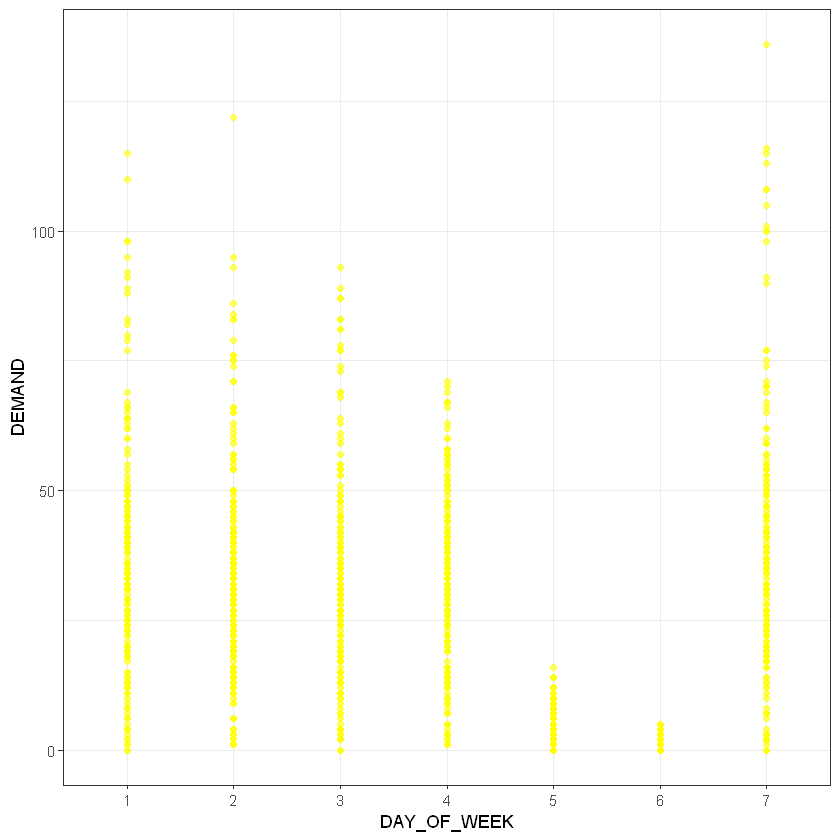

In [268]:
ggplot(bicup.df.ploter,aes(DAY_OF_WEEK,DEMAND))+ geom_point(alpha=0.6,color='yellow')+theme_bw()

Voila!